# Titanic Competition - EDA - Ramin F.

In this notebook we are going to explore the data and perform all the steps before Modeling in CRISP-DM methodology. In this competition the goal is to predict whether if passengers were survived or not.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('darkgrid')

In [77]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


as you can see there are some features that requires further explanation, we will discuss them further:
- Pclass: this feature specificy the socio-economic status. this feature is discrete and has 3 classes:
    - 1: Upper Class
    - 2: Middle Class
    - 3: Lower Class
- Age: the age in this dataset is fractional, since there are passenger with less than a year age.
- SibSp: Number of sibling / spouses abroad the titanic.
- Parch: Number of parents / children abroad the titanic.
- Embarked: Port of embarkation. this feature is discrete and has 3 classes:
    - C: Cherbourg
    - Q: Queenstown
    - S: Southampton

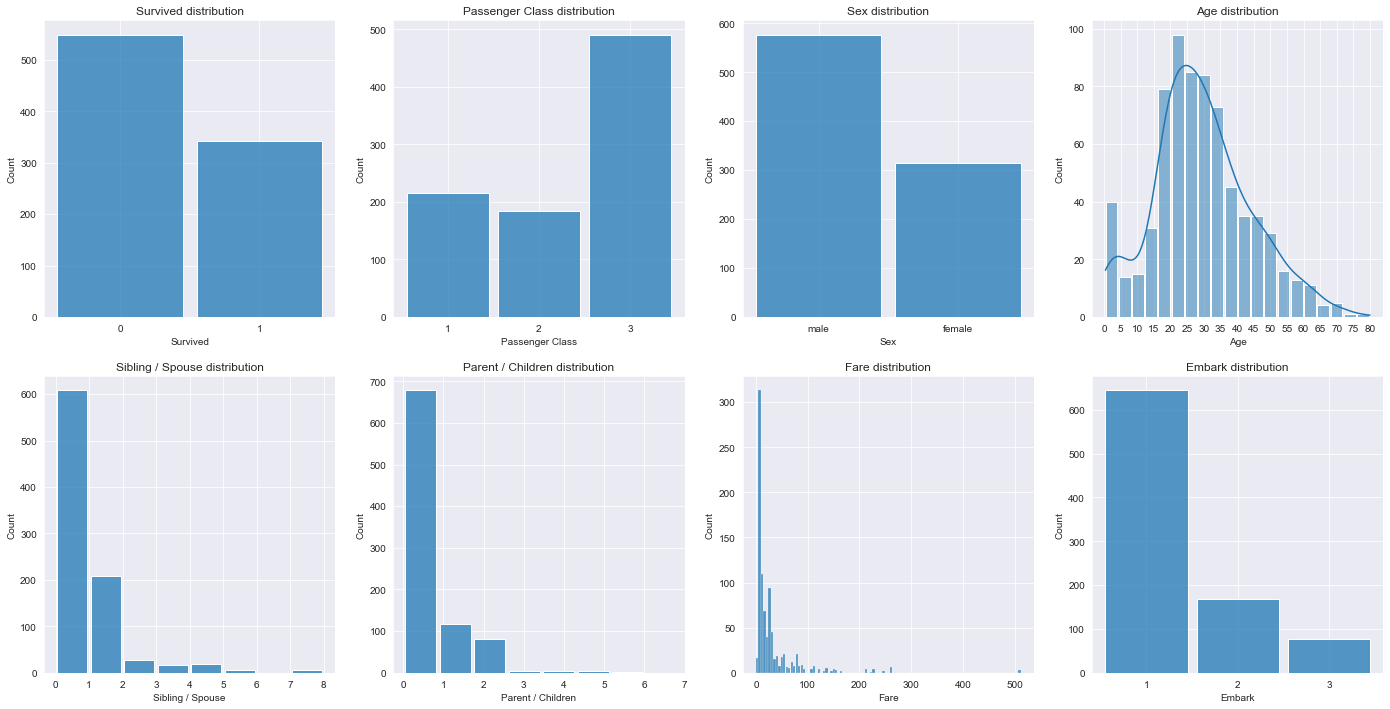

In [92]:
fig, axes = plt.subplots(2, 4, figsize=(24,12))

sns.histplot(data=train, x='Survived', bins=2, shrink=.9, ax=axes[0, 0], discrete=True)
axes[0, 0].set_title('Survived distribution')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_xticks([0, 1])

sns.histplot(data=train, x='Pclass', bins=3, shrink=.9, ax=axes[0, 1], discrete=True)
axes[0, 1].set_title('Passenger Class distribution')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_xticks([1, 2, 3])

sns.histplot(data=train, x='Sex', bins=2, shrink=.9, ax=axes[0, 2], discrete=True)
axes[0, 2].set_title('Sex distribution')
axes[0, 2].set_xlabel('Sex')

sns.histplot(data=train, x='Age', bins=20, shrink=.9, ax=axes[0, 3], kde=True)
axes[0, 3].set_title('Age distribution')
axes[0, 3].set_xlabel('Age')
axes[0, 3].set_xticks(range(0, 80 + 1, 5))

sns.histplot(data=train, x='SibSp', bins=8, shrink=.9, ax=axes[1, 0])
axes[1, 0].set_title('Sibling / Spouse distribution')
axes[1, 0].set_xlabel('Sibling / Spouse')
axes[1, 0].set_xticks(range(0, 8 + 1, 1))

sns.histplot(data=train, x='Parch', bins=7, shrink=.9, ax=axes[1, 1])
axes[1, 1].set_title('Parent / Children distribution')
axes[1, 1].set_xlabel('Parent / Children')
axes[1, 1].set_xticks(range(0, 7 + 1, 1))

sns.histplot(data=train, x='Fare', shrink=.9, ax=axes[1, 2])
axes[1, 2].set_title('Fare distribution')
axes[1, 2].set_xlabel('Fare')

temp = train.copy()
temp['Embarked'][temp['Embarked'] == 'S'] = 1
temp['Embarked'][temp['Embarked'] == 'C'] = 2
temp['Embarked'][temp['Embarked'] == 'Q'] = 3
sns.histplot(data=temp, x='Embarked', bins=3, shrink=.9, ax=axes[1, 3], discrete=True)
axes[1, 3].set_title('Embark distribution')
axes[1, 3].set_xlabel('Embark')
axes[1, 3].set_xticks([1,2,3])

plt.show()